In [1]:
from matplotlib import pyplot as plt
import numpy as np

import json
import os, sys
from os.path import join

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from config import DATA_PATH

plt.rcdefaults() 
%matplotlib inline

INPUT_PATH = join(DATA_PATH, "classifiers/mnist/")
CLASSIFIERS = ["resnet/relu", "resnet/brelu", "cnn/relu", "cnn/brelu", "cnn/relu/gaussian/stdev0.30/pert-insts10"]
               
accuracies = {}
for c in CLASSIFIERS:
    with open(join(INPUT_PATH, c, "accuracies.json"), "r") as json_file:
        accuracies[c] = json.load(json_file)

Accuracy on white-box attacks with fgsm


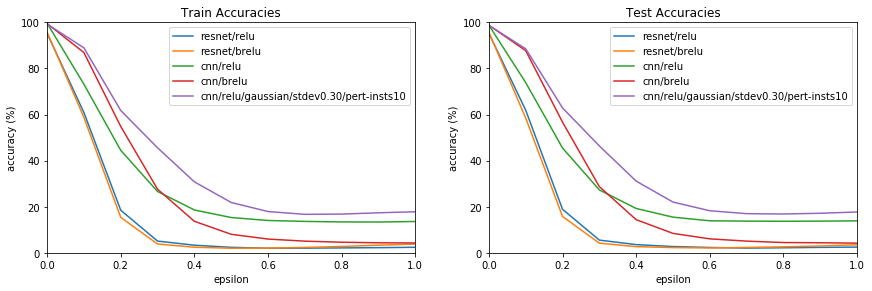

In [2]:
print("Accuracy on white-box attacks with fgsm")
PATH = "/dccstor/dlw/data/adversarial_learning/adversarial/mnist/"

train, test = {}, {}
eps_values = [e/10 for e in range(1, 11)]

for c in CLASSIFIERS:
    train[c] = [accuracies[c]["train_accuracy"]]
    test[c] = [accuracies[c]["test_accuracy"]]

    for eps in eps_values:
        train[c].append(accuracies[c][join(PATH, c, "fgsm", "eps%.2f_train.npy" % eps)])
        test[c].append(accuracies[c][join(PATH, c, "fgsm", "eps%.2f_test.npy" % eps)])

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.title("Train Accuracies")

for c in CLASSIFIERS:
    plt.plot([0.] + eps_values, train[c], label=c)

ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
plt.xlabel("epsilon")
plt.ylabel("accuracy (%)")
plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title("Test Accuracies")

for c in CLASSIFIERS:
    plt.plot([0.] + eps_values, test[c], label=c)
    
ax.set_xlim([0, 1])
ax.set_ylim([0, 100])
plt.xlabel("epsilon")
plt.ylabel("accuracy (%)")
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.legend()

CNN seems to work better than a ResNet. 
- Is it due to the choice of ResNet? Maybe, as the accuracies on the true samples are slightly worse than those of a CNN

CNN with Brelu activations is considerably better than a CNN with Relu activations on small perturbations.
- Is it because we reduce the variance? Maybe, we need to try on CIFAR10 to check if the accuracy on true examples doesn't change.

All in all, it seems that the linear hypothesis + accumulation of errors stand (and not the vanishing units), because 
1. by bounding the activation outputs we reduce the impact of the attack (brelu))
2. by keeping the residual from the previous layers the accuracy doesn't improve (ResNet)

Check on black-box attacks and on other datasets.

Accuracy on white-box attacks with deepfool


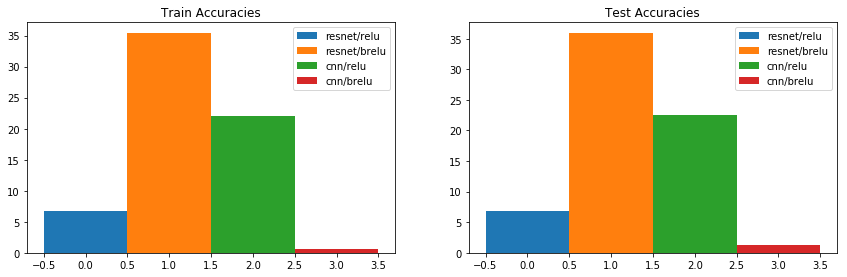

In [16]:
print("Accuracy on white-box attacks with deepfool")
%matplotlib inline
train, test = {}, {}

for c in CLASSIFIERS:
    train[c] = accuracies[c][join(PATH, c, "deepfool", "train.npy")]
    test[c] = accuracies[c][join(PATH, c, "deepfool", "test.npy")]

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.title("Train Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, train[c], 1, label=c)

plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title("Test Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, test[c], 1, label=c)
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.legend()

Accuracy on white-box attacks with universal-deepfool


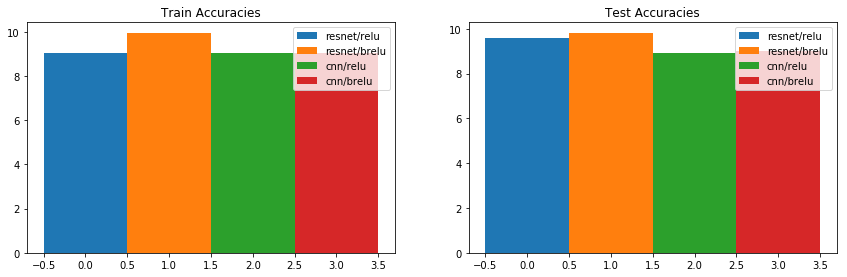

In [17]:
print("Accuracy on white-box attacks with universal-deepfool")
%matplotlib inline
train, test = {}, {}

for c in CLASSIFIERS:
    train[c] = accuracies[c][join(PATH, c, "universal", "train.npy")]
    test[c] = accuracies[c][join(PATH, c, "universal", "test.npy")]

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.title("Train Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, train[c], 1, label=c)

plt.legend()

ax = fig.add_subplot(1, 2, 2)
plt.title("Test Accuracies")

for i,c in enumerate(CLASSIFIERS):
    ax.bar(i, test[c], 1, label=c)
    
plt.subplots_adjust(bottom=0.1, right=2, top=0.9)
plt.legend()

ResNet seems to work better, BUT this is just the accuracies with an umbounded perturbation. Probably, it needs smaller perturbations to be fooled.

Need to show also the empirical robustness.